In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def euclidean_projection_L1(x, t):
    if np.linalg.norm(x, ord=1) <= t:
        return x
    else:
        u = np.abs(x)
        u_sorted = np.sort(u)[::-1]
        cumsum = np.cumsum(u_sorted)
        rho = np.max(np.where(u_sorted - (1 / (np.arange(1, len(u_sorted) + 1))) * (cumsum - t) > 0))
        theta = (1 / (rho + 1)) * (cumsum[rho] - t)
        return np.sign(x) * np.maximum(u - theta, 0)

# Example usage
a_1 = -4
a_2 = 3
x = np.array([a_1,a_2])
t = 1
projection = euclidean_projection_L1(x, t)
print("Original vector:", x)
print("Projection onto L1 ball with radius", t, ":", projection)


Original vector: [-4  3]
Projection onto L1 ball with radius 1 : [-1.  0.]


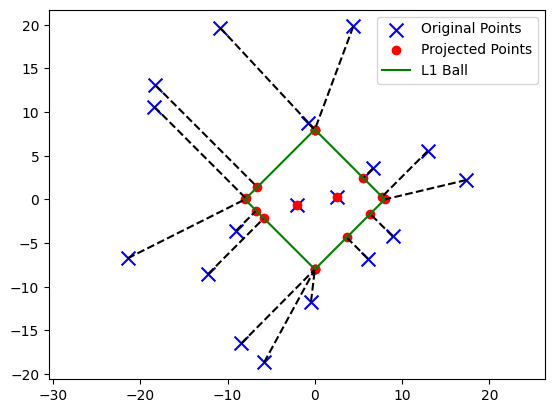

In [20]:
n = 18
scale = 10
np.random.seed(669120410)
points = np.random.randn(n,2)*scale
t = 8
new_points = np.array([euclidean_projection_L1(p, t) for p in points])

plt.scatter(points[:,0], points[:,1], label='Original Points', color='blue', marker='x', s=100)
plt.scatter(new_points.T[0],new_points.T[1], label='Projected Points', color='red')
for i in range(len(points)):
    plt.plot([points[i][0], new_points[i][0]], [points[i][1], new_points[i][1]], color='black', linestyle='--')
plt.plot([0,t,0,-t,0],[t,0,-t,0,t], color='Green', linestyle='-', label='L1 Ball')
plt.legend()
plt.axis('equal')
plt.savefig('l1_projection.jpg',dpi=300)